## Handwritten letters

### Necessary imports

In [73]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import random

### Read the data

We take a random sample from dataset due to is very big

In [74]:
n = 372450 # number of records in file
s = 62576 # desired sample size
skip = sorted(random.sample(range(n),n-s))
data = pd.read_csv(r"../data/A_Z Handwritten Data.csv", skiprows=skip).astype('float32')
print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.630  0.631  0.632  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.633  0.634  0.635  0.636  0.637  0.638  0.639  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

### Split data into images and their labels

In [75]:
X = data.drop('0',axis = 1)
y = data['0']

### Reshaping the data in the csv file so that it can be displayed as an image

In [76]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (50060, 28, 28)
Test data shape:  (12516, 28, 28)


In [77]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

### Plotting the number of alphabets in the dataset

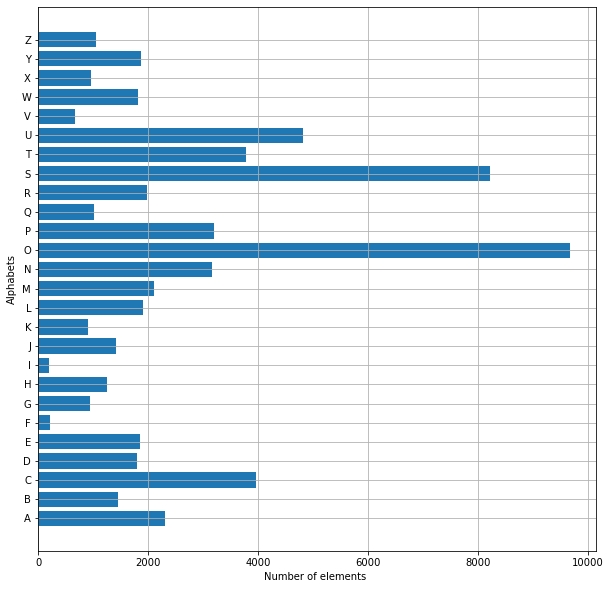

In [78]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

### Shuffling the data

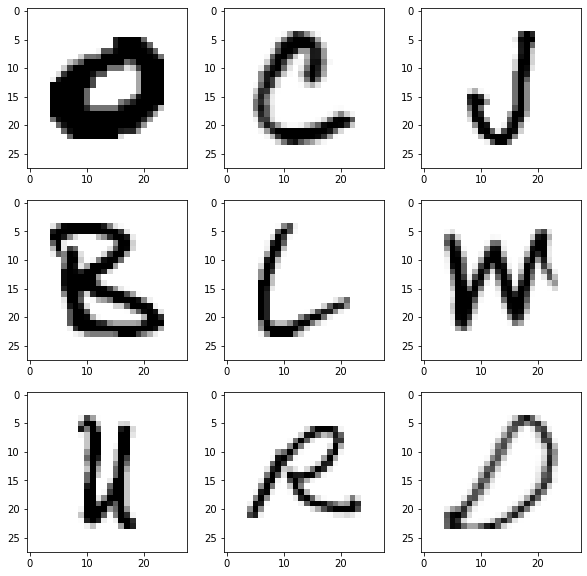

In [79]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

### Data Reshaping

In [80]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (50060, 28, 28, 1)
New shape of train data:  (12516, 28, 28, 1)


In [81]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (50060, 26)
New shape of test labels:  (12516, 26)


### CNN Model

In [82]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

### Compiling and fitting model

In [83]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=2,  validation_data = (test_X,test_yOHE))

Train on 50060 samples, validate on 12516 samples
Epoch 1/2
50060/50060 [==============================] - 177s 4ms/step - loss: 0.4174 - accuracy: 0.8949 - val_loss: 0.1349 - val_accuracy: 0.9628
Epoch 2/2
50060/50060 [==============================] - 179s 4ms/step - loss: 0.1222 - accuracy: 0.9641 - val_loss: 0.1006 - val_accuracy: 0.9723


In [84]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)              

In [87]:
print("The validation accuracy is :", history.history['val_accuracy'][1])
print("The training accuracy is :", history.history['accuracy'][1])
print("The validation loss is :", history.history['val_loss'][1])
print("The training loss is :", history.history['loss'][1])

The validation accuracy is : 0.9722754955291748
The training accuracy is : 0.9640631
The validation loss is : 0.10060793337834532
The training loss is : 0.1221834789955251


### Doing some predictions on test data

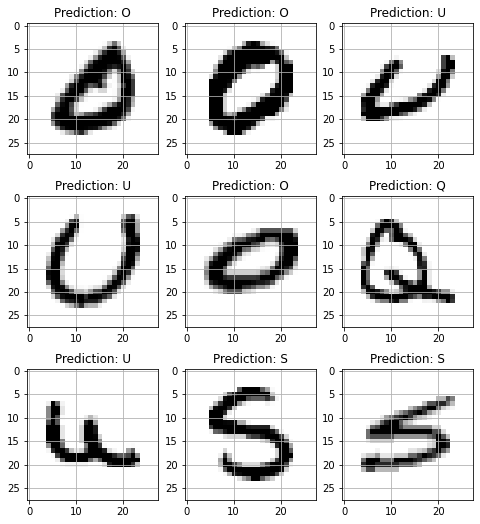

In [89]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()